# 说明---三个有效秩

为了更好的反应不同的scale对应的有效秩的大小和变化情况,希望可以在每一个scale下多做几次计算,这样的话,可以通过取平均等方法消除不确定的噪音

In [1]:
# 首先加载自己的支持函数
from support_code.get_rank_cpu_0904 import get_Effective_Ranks, Effective_Ranks
from support_code.load_dataset import get_data_loader
from support_code.MLP import MLP
from support_code.scale_ranks import get_rank
# 然后加载其他可能需要的库
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import CIFAR10
import numpy as np
from torch.optim.lr_scheduler import LambdaLR   # 这个用来实现学习率的线性变化


In [2]:
import pandas as pd

# ------------------------------------训练开始前的基本设置---------------------------------------------------
# 设置设备
device_cuda = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 创建一个空的DataFrame
df_list = []

# ---------------------------------- 设置结束----------------------------------------------------------------------------------
# 定义第一维的内容，一个名为"rank_dict"的字典
rank_dict = {
    "first": 1,
    "second": 2,
    "third": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "seven": 7,
    "eight": 8,
    "nine": 9
}

# 定义第二维的标签，从0.1到0.9，步长为0.1
scales = [i / 10.0 for i in range(1, 10)]

# 创建三维DataFrame
for scale in scales:
    print("--------------------开始scale={}的情况---------------------".format(scale), "\n")
    train_loader, valid_loader, test_loader = get_data_loader(scale, valid_scale=0.1)
    print("首先得到了有效秩的情况 \n")
    for key, value in rank_dict.items():
        # train_loader, valid_loader, test_loader = get_data_loader(scale, valid_scale=0.1)
        # 创建一个临时的DataFrame
        temp_df = pd.DataFrame({
            "rank_dict": [get_rank(scale=scale,device=device_cuda, train_loader=train_loader)],
            "scale": [scale],
            "dimension": [key]
        })
        df_list.append(temp_df)

# 使用concat将多个DataFrame连接成一个
df = pd.concat(df_list, ignore_index=True)

# 打印DataFrame
print(df)


--------------------开始scale=0.1的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.2的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.3的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.4的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.5的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.6的情况--------------------- 

Files already downloaded and verified
Files already downloaded and verified
首先得到了有效秩的情况 

--------------------开始scale=0.7的情况--------------------- 

Files already downloaded and verified
Files already do

In [3]:
import pandas as pd

# 创建一个ExcelWriter对象
with pd.ExcelWriter('rank_out.xlsx', engine='xlsxwriter') as writer:
    # 获取所有不同的dimension值
    dimensions = df['dimension'].unique()
    
    # 针对每个dimension创建一个sheet
    for dimension in dimensions:
        subset_df = df[df['dimension'] == dimension]
        
        # 创建一个以scales为行索引、rank_dict.keys()为列索引的DataFrame
        pivot_df = pd.DataFrame(subset_df['rank_dict'].tolist(), index=subset_df['scale'])
        
        # 将DataFrame写入Excel，以dimension作为sheet名称
        pivot_df.to_excel(writer, sheet_name=dimension)

# 打印信息
print("Excel文件已创建")

Excel文件已创建


In [4]:
import pandas as pd
import numpy as np

# 读取Excel文件
excel_file = 'rank_out.xlsx'
xls = pd.ExcelFile(excel_file)

# 获取所有sheet的名称
sheet_names = xls.sheet_names

# 初始化一个空的三维NumPy矩阵
num_sheets = len(sheet_names)
num_scales = None
num_features = None

for sheet_index, sheet_name in enumerate(sheet_names):
    # 读取每个sheet的数据
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # 获取数据的维度信息
    if sheet_index == 0:
        num_scales = len(df)
        num_features = len(df.columns)

    # 将DataFrame数据转换为NumPy数组
    sheet_data = df.values
    
    if sheet_index == 0:
        # 在第一次迭代时创建完整的三维矩阵
        data_array = np.zeros((num_sheets, num_scales, num_features), dtype=sheet_data.dtype)
    
    # 将sheet数据填充到三维矩阵的相应位置
    data_array[sheet_index, :, :] = sheet_data

# 现在你有一个三维的NumPy矩阵data_array，其中dim=0对应于sheet，dim=1对应于scale下的数值，dim=2对应于rk_max_index_scale、rk_max_value_scale、Rk_max_value_sacel、r0_sacle 下的数值。
# 你可以使用data_array进行后续的分析或操作。

# 打印信息
print("Excel文件已读取并转换为三维NumPy矩阵")
print("矩阵形状:", data_array.shape)


Excel文件已读取并转换为三维NumPy矩阵
矩阵形状: (9, 9, 5)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


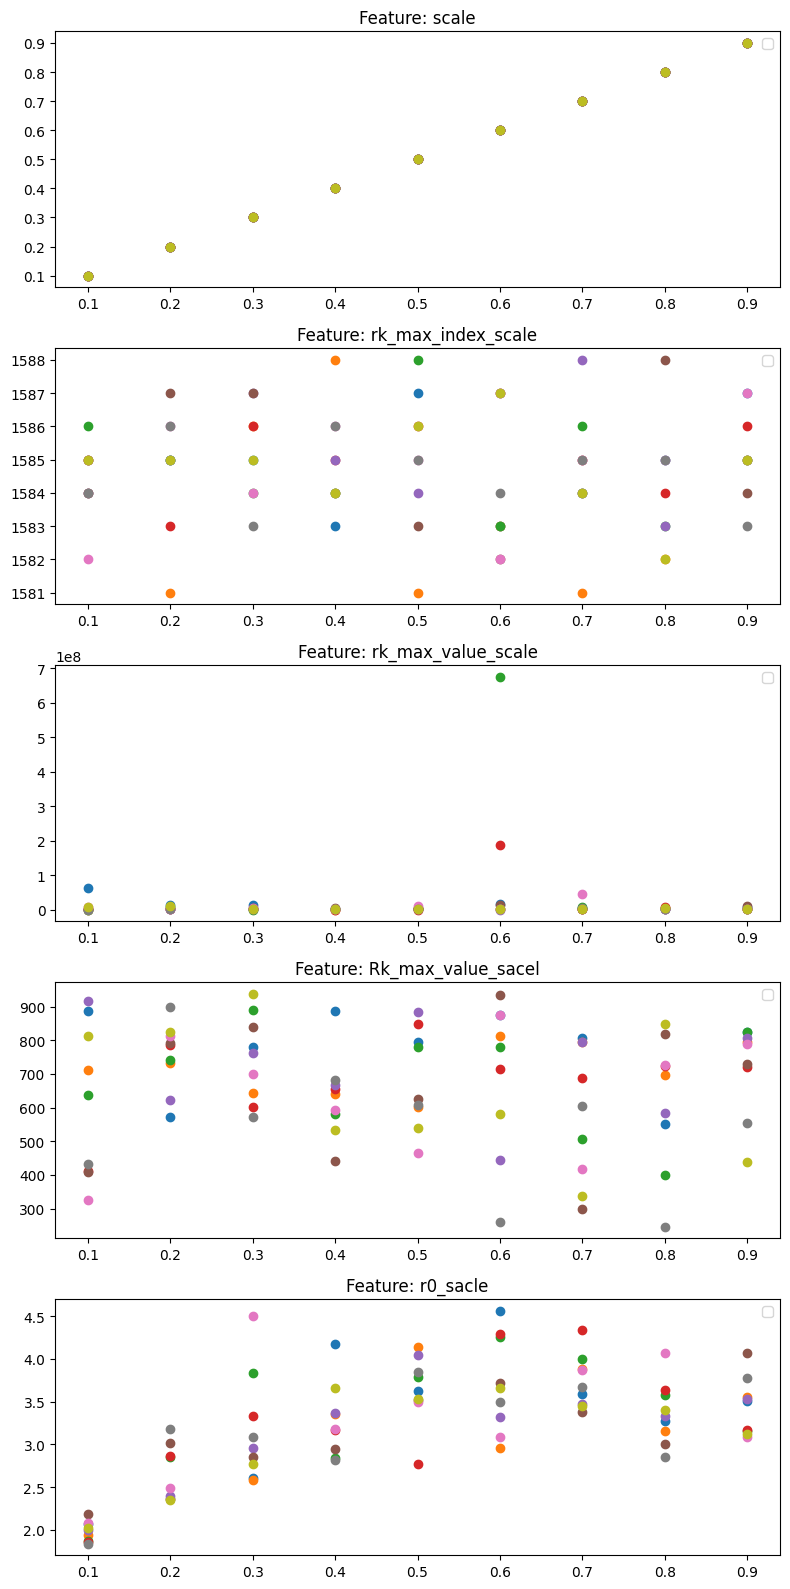

In [25]:
import matplotlib.pyplot as plt

# 假设data_array是你的三维NumPy矩阵，维度为(num_sheets, num_scales, num_features)

# 指定要绘制的4个图的索引，这里对应于四个特征
plot_indices = ["scale", "rk_max_index_scale", "rk_max_value_scale", "Rk_max_value_sacel", "r0_sacle"]

# 创建4个子图，每个子图包含一个散点图，同时显示一个特征的三个数据
fig, axs = plt.subplots(5, 1, figsize=(8, 16))

for i, feature_name in enumerate(plot_indices):
    # 提取子矩阵，这里假设从data_array中提取子矩阵的方式
    # 这里的示例是随机的，你需要根据你的数据结构选择正确的方式
    sub_matrix = data_array[:, :, i]  # 提取整个子矩阵
    
    # 提取子矩阵的横坐标（0.1，0.2，...，0.9）
    x_values = np.arange(0.1, 1.0, 0.1) # 这里不是很好,因为相当于固定了scale_max=0.9,如果发生调整还需要手动调整
    
    # 计算每个横坐标对应的误差棒数据，这里使用标准差作为误差棒
    error_values = np.std(sub_matrix, axis=0)
    
    # 使用errorbar函数添加误差棒
    for j in range(9):
        # axs[i].errorbar(x_values, sub_matrix[j, :], yerr=error_values, fmt='o', capsize=5, elinewidth=2, label='Error Bar {}'.format(j))
        axs[i].scatter(x_values, sub_matrix[j,:])
    # axs[i].errorbar(x_values, sub_matrix[1, :], yerr=error_values, fmt='x', capsize=5, elinewidth=2, label='Error Bar 2')
    # axs[i].errorbar(x_values, sub_matrix[2, :], yerr=error_values, fmt='^', capsize=5, elinewidth=2, label='Error Bar 3')
    
    # 设置图标题
    axs[i].set_title(f'Feature: {feature_name}')
    
    # 添加图例
    axs[i].legend()

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()
